# Plot C3PO Data
Save google sheet data as .csv, find and replace " marks with nothing, make simple time-series plot

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter

import seaborn as sns

import datetime
import os

In [51]:
filepath = os.path.join('Data', '2025_04_24_to_2025_10_13_PublishedData.csv')
df_full = pd.read_csv(filepath, header = None, parse_dates = [1])
df_full.columns = ['Device_ID', 'Datetime Transmission', 'Sensor', 'Event', 'Unix Time', 'Temperature (ºC)', 'Conductivity (µS/cm)']
df_full.head()

,Device_ID,Datetime Transmission,Sensor,Event,Unix Time,Temperature (ºC),Conductivity (µS/cm)
0,e00fce680b66f0052c113d66,2025-04-24 11:00:06,c3po,cond,1745506803,24.48,0.0
1,e00fce680b66f0052c113d66,2025-04-24 11:06:06,c3po,cond,1745507163,26.02,0.0
2,e00fce680b66f0052c113d66,2025-04-24 11:12:05,c3po,cond,1745507522,25.71,0.0
3,e00fce680b66f0052c113d66,2025-04-24 11:18:06,c3po,cond,1745507882,25.34,0.0
4,e00fce680b66f0052c113d66,2025-04-24 11:24:06,c3po,cond,1745508242,25.67,0.0


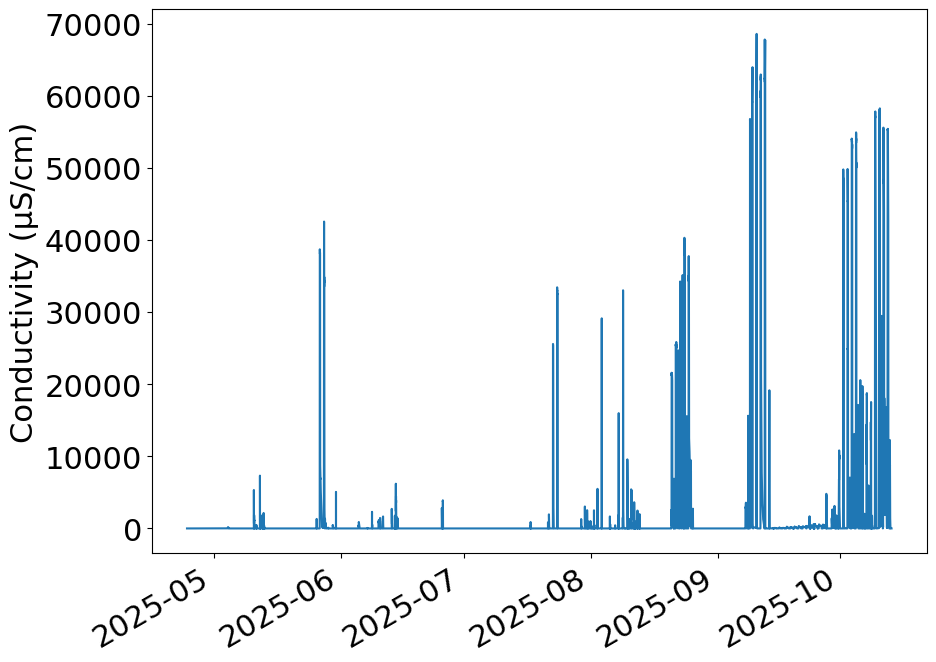

In [53]:
fig, axs = plt.subplots(figsize = (10, 8))
axs.plot(df_full['Datetime Transmission'], df_full['Conductivity (µS/cm)'])

axs.set_ylabel('Conductivity (µS/cm)')

fig.autofmt_xdate()

plt.savefig('Figures/c3po_time-series_2025-Apr-Oct.png', dpi = 300)

In [55]:
#Loading in salinity instead of conductivity 
filename = 'ApriltoOctoberSalinity'

filepath = os.path.join('data', filename+'.csv')
sal = pd.read_csv(filepath, header = 0)
sal['datetime']=pd.to_datetime(sal["Real_Time"], unit='s')
sal['datetime'] = sal['datetime'] - pd.Timedelta(hours=4, minutes=0, seconds=0)
sal.head()

,V1,V2,V3,V4,Real_Time,V6,V7,V7.cor,Cond_mScm,seaPressure,practicalSalinity,datetime
0,e00fce680b66f0052c113d66,4/24/2025 11:00:06,c3po,cond,1745506803,24.48,0.0,262.0,0.262,0,0.125351,2025-04-24 11:00:03
1,e00fce680b66f0052c113d66,4/24/2025 11:06:06,c3po,cond,1745507163,26.02,0.0,262.0,0.262,0,0.121398,2025-04-24 11:06:03
2,e00fce680b66f0052c113d66,4/24/2025 11:12:05,c3po,cond,1745507522,25.71,0.0,262.0,0.262,0,0.122176,2025-04-24 11:12:02
3,e00fce680b66f0052c113d66,4/24/2025 11:18:06,c3po,cond,1745507882,25.34,0.0,262.0,0.262,0,0.123116,2025-04-24 11:18:02
4,e00fce680b66f0052c113d66,4/24/2025 11:24:06,c3po,cond,1745508242,25.67,0.0,262.0,0.262,0,0.122277,2025-04-24 11:24:02


In [57]:
filename = 'CB02ApriltoOctober' #downloaded water level data from CB02
filepath = os.path.join('data', filename+'.csv')
wl = pd.read_csv(filepath, header = 0, parse_dates = [0])
wl.head()

,Time (America/New_York),SUNNYD_CB_02 Water level (ft),SUNNYD_CB_02 Water level (ft) quality
0,2025-08-28 23:16:00,0.931628,not evaluated
1,2025-08-28 23:22:00,0.952400,not evaluated
2,2025-08-28 23:28:00,0.969030,not evaluated
3,2025-08-28 23:34:00,0.985201,not evaluated
4,2025-08-28 23:40:00,1.006076,not evaluated


In [59]:
y2= wl[wl["SUNNYD_CB_02 Water level (ft)"] > 2.39]
print(y2)

     Time (America/New_York)  SUNNYD_CB_02 Water level (ft)  \
1304     2025-09-07 19:24:00                       2.576465   
1305     2025-09-07 19:30:00                       2.616627   
1306     2025-09-07 19:36:00                       2.626624   
1307     2025-09-07 19:42:00                       2.627338   
1308     2025-09-07 19:48:00                       2.630778   
...                      ...                            ...   
9463     2025-10-29 16:55:00                       2.572720   
9464     2025-10-29 17:01:00                       2.573431   
9465     2025-10-29 17:07:00                       2.573187   
9466     2025-10-29 17:13:00                       2.569059   
9467     2025-10-29 17:19:00                       2.567941   

     SUNNYD_CB_02 Water level (ft) quality  
1304                         not evaluated  
1305                         not evaluated  
1306                         not evaluated  
1307                         not evaluated  
1308              

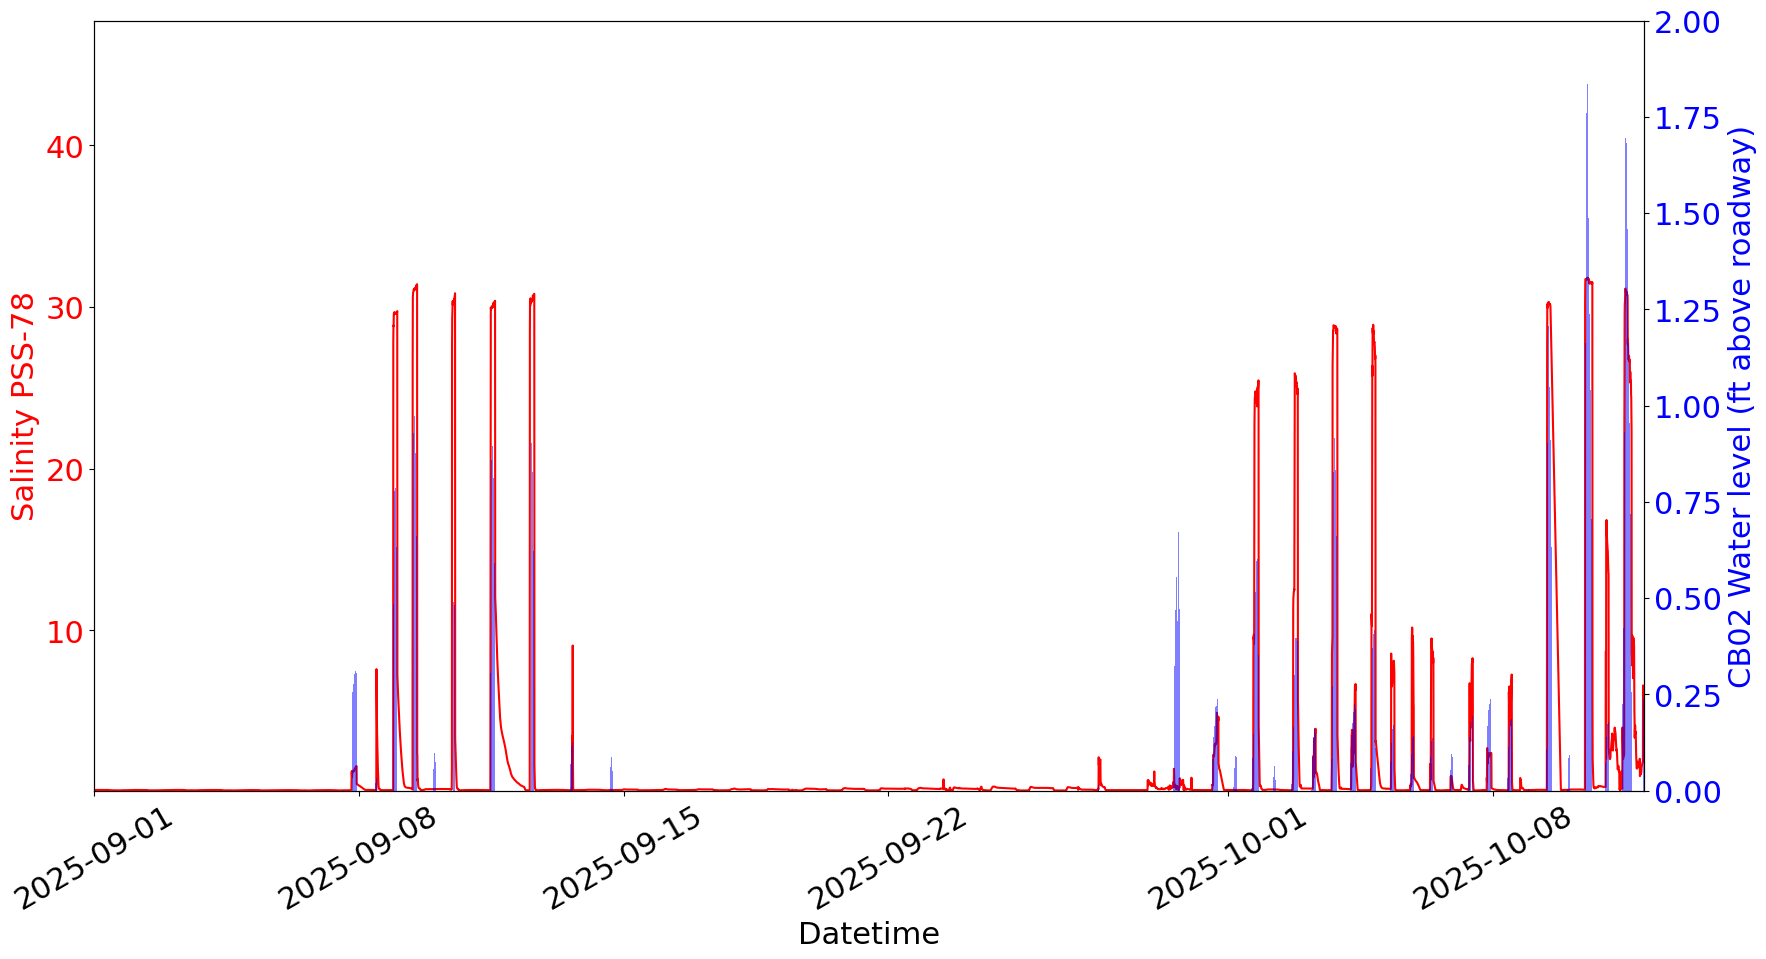

In [61]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(figsize = (20, 10))
ax2 = axs.twinx()

#Plot the conductivity 
y1 = sal["practicalSalinity"]
y1max = np.nanmax(y1)
y1min = np.nanmin(y1)
y1range = y1max-y1min
axs.plot(sal["datetime"], y1, label = "Salinity", color = "red")
axs.set_ylabel('Salinity PSS-78', color="red")
axs.set_ylim(y1min, y1max*1.5)
axs.set_xlabel('Datetime')
axs.tick_params(axis='y', labelcolor="red")
axs.tick_params(axis='x', labelrotation=30)


# Add tides 
y2 = wl["SUNNYD_CB_02 Water level (ft)"]
#y2min = np.nanmin(y2)
#y2max = np.nanmax(y2)
#y2range = y2max-y2min
ax2.bar(wl["Time (America/New_York)"], y2-2.39, color = "blue", alpha = 0.5, width = 0.004)
ax2.set_ylabel('CB02 Water level (ft above roadway)', color="blue")  
ax2.set_ylim(0, 2)
ax2.tick_params(axis='y', labelcolor="blue")

axs.set_xlim(pd.Timestamp('2025-09-01 00:00:00'), pd.Timestamp('2025-10-12 00:00:00'))

fig_fn = 'C3PO_waterlevel_salinity_lf'
fig_file = os.path.join('Figures', fig_fn+'.png')
plt.savefig(fig_file, dpi = 400, transparent=False, bbox_inches='tight')